In [2]:
# %pip install -r requirements.txt

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Set random seed for reproducibility
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)

2025-02-21 14:46:56.678177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.__version__

'2.18.0'

In [7]:
import keras
print(keras.__version__)

3.8.0


# Load dataset

In [10]:
df = pd.read_csv("iris_synthetic_data.csv")
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [11]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [12]:
class_mapping = {label:idx for idx, label in enumerate(df['label'].unique())}
class_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [13]:
df['classlabel'] = df['label'].map(class_mapping)
df.head()

,sepal length,sepal width,petal length,petal width,label,classlabel
0,5.2,3.8,1.5,0.3,Iris-setosa,0
1,5.3,4.1,1.5,0.1,Iris-setosa,0
2,4.8,3.1,1.5,0.2,Iris-setosa,0
3,5.2,3.7,1.5,0.2,Iris-setosa,0
4,4.9,3.0,1.5,0.3,Iris-setosa,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,:-2].values, df.iloc[:,-1].values
# print (X[0],y[0])

# split train test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Calibration data
X_train, X_calib, y_train, y_calib = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0
)

# normalize X
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)
X_calib_norm = mms.fit_transform(X_calib)
print(X_train_norm[0:2], X_train_norm[0:2].shape)
print(X_train_norm.shape, X_test_norm.shape, X_calib_norm.shape)


[[0.34285714 0.375      0.43103448 0.5       ]
 [0.28571429 0.58333333 0.0862069  0.04166667]] (2, 4)
(1687, 4) (750, 4) (563, 4)


Text(0.5, 1.0, 'petal length')

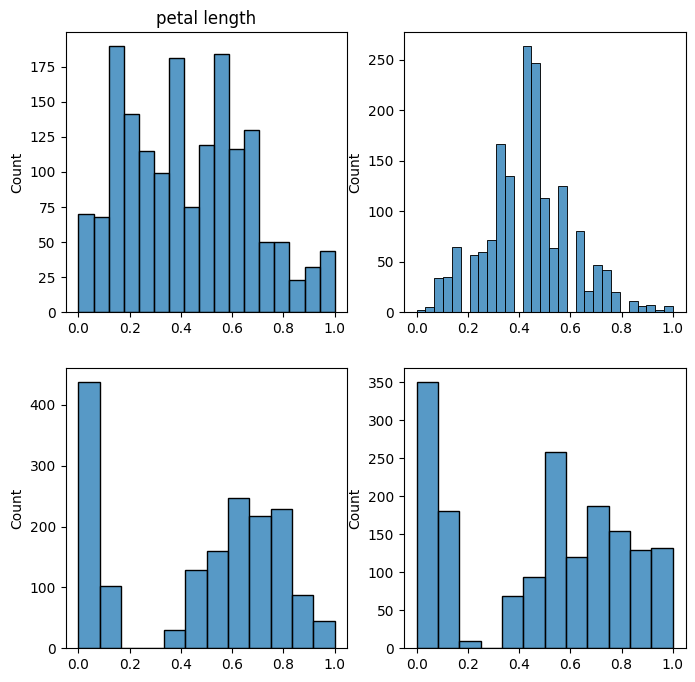

In [15]:
# plot distribution of X
fig, axes = plt.subplots(2,2, figsize=(8,8))

sns.histplot(x=X_train_norm[:,0], ax=axes[0,0])
axes[0,0].set_title('sepal length')
sns.histplot(x=X_train_norm[:,1], ax=axes[0,1])
axes[0,0].set_title('sepal width')
sns.histplot(x=X_train_norm[:,2], ax=axes[1,0])
axes[0,0].set_title('petal length')
sns.histplot(x=X_train_norm[:,3], ax=axes[1,1])
axes[0,0].set_title('petal length')


# Classification model

In [27]:
# Classification model
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation="softmax"),
])

model1.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model1.fit(
    X_train_norm,
    y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3397 - loss: 1.1977 - val_accuracy: 0.3373 - val_loss: 1.1160
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.0879 - val_accuracy: 0.4941 - val_loss: 1.0259
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - loss: 1.0017 - val_accuracy: 0.6568 - val_loss: 0.9472
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.9260 - val_accuracy: 0.6568 - val_loss: 0.8765
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.8580 - val_accuracy: 0.6568 - val_loss: 0.8124
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 0.7964 - val_accuracy: 0.6568 - val_loss: 0.7551
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 0.7418 - val_accuracy: 0.6568 - val_loss: 0.7048
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.6940 - val_accuracy: 0.6657 - val_loss: 0.6606
Epo

In [28]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation="softmax"),
])

model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model2.fit(
    X_train_norm,
    y_train,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3870 - loss: 1.2876 - val_accuracy: 0.6716 - val_loss: 1.1836
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 1.1500 - val_accuracy: 0.6598 - val_loss: 1.0600
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 1.0311 - val_accuracy: 0.6627 - val_loss: 0.9529
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6589 - loss: 0.9284 - val_accuracy: 0.6598 - val_loss: 0.8598
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.8394 - val_accuracy: 0.6598 - val_loss: 0.7790
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.7626 - val_accuracy: 0.6598 - val_loss: 0.7097
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6968 - val_accuracy: 0.6657 - val_loss: 0.6509
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.6412 - val_accuracy: 0.6834 - val_loss: 0.6

# Conformal prediction

In [31]:
from deel.puncc.api.prediction import BasePredictor
from deel.puncc.classification import APS

# Instantiation
model1_cp = APS(model1, train=False) 
model2_cp = APS(model2, train=False)

In [32]:
# Calibration
model1_cp.fit(X_calib=X_calib_norm,y_calib=y_calib)
model2_cp.fit(X_calib=X_calib_norm,y_calib=y_calib)

 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
# Conformal inference
alpha = 0.05

y_pred1, set_pred1 = model1_cp.predict(X_test_norm, alpha=alpha)
y_pred2, set_pred2 = model2_cp.predict(X_test_norm, alpha=alpha)

 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
print(y_pred1[0])
print(np.max(y_pred1[0]))
print(np.argmax(y_pred1[0]))

[0.7359642  0.09691714 0.12111176 0.04600686]
0.7359642
0


In [35]:
print(y_pred2[0])
print(np.max(y_pred2[0]))
print(np.argmax(y_pred2[0]))

[9.9994093e-01 5.8671361e-05 6.4325299e-12 4.0197412e-07]
0.99994093
0


In [36]:
sample = 20

# sort y_pred[sample] in reversed order
ranked_pred = y_pred1[sample].argsort()[::-1]

# Get prediction probabilities for elements in set_pred
probs = [y_pred1[sample][i] for i in set_pred1[sample]]

# Format probabilities for display
prob_str = ", ".join([f"{i:.2f}" for i in probs])

print(f"Point prediction: {np.argmax(y_pred1[sample])} \n "
    + f"Prediction set: {set_pred1[sample]} \n True label: {y_test[sample]} \n"
    + f"Prediction Probabilities: {prob_str}")  # Add probabilities to the title)

Point prediction: 2 
 Prediction set: [np.int64(2), np.int64(1)] 
 True label: 2 
Prediction Probabilities: 0.63, 0.34


In [37]:
from deel.puncc import metrics

mean_coverage = metrics.classification_mean_coverage(y_test, set_pred1)
mean_size = metrics.classification_mean_size(set_pred1)

print(f"Empirical coverage : {mean_coverage:.2f}")
print(f"Average set size : {mean_size:.2f}")

Empirical coverage : 0.95
Average set size : 1.95


In [38]:
# Get nonconformity scores
nonconf_scores = model1_cp.conformal_predictor.get_nonconformity_scores()[0]

# Size of the calibration set
n = len(nonconf_scores)

# Compute the calibrated treshold
calibrated_treshold = np.quantile(
    nonconf_scores, (1 - alpha) * (n + 1) / n, method="inverted_cdf"
)

print(f"Uncalibrated treshold : {1-alpha:.2f}")
print(f"Calibrated treshold : {calibrated_treshold:.2f}")

Uncalibrated treshold : 0.95
Calibrated treshold : 0.86


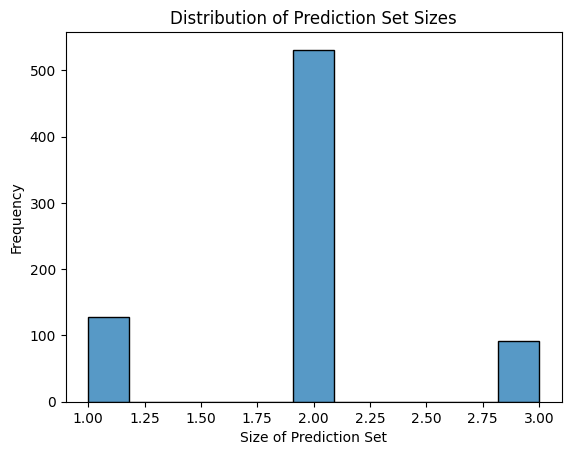

In [39]:
set_sizes = [len(s) for s in set_pred1]

sns.histplot(set_sizes)
plt.xlabel("Size of Prediction Set")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Set Sizes")
plt.show()

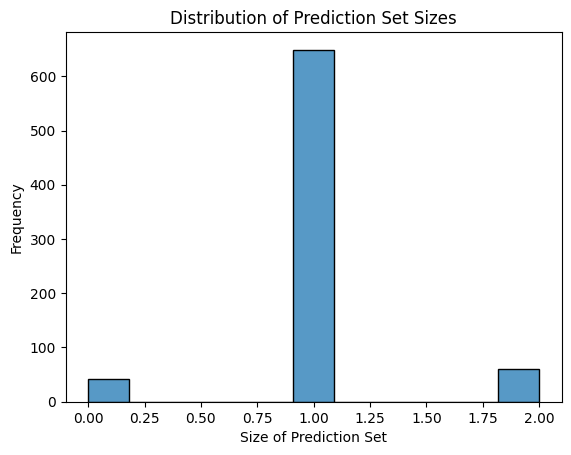

In [40]:
set_sizes = [len(s) for s in set_pred2]

sns.histplot(set_sizes)
plt.xlabel("Size of Prediction Set")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Set Sizes")
plt.show()